# Рассмотрим сделки по К+, за 2022 год

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
data=pd.read_excel('2022.xlsx')

In [40]:
data.shape

(1409, 19)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Ссылка                  1409 non-null   object        
 1   ПометкаУдаления         1409 non-null   object        
 2   Код                     1409 non-null   int64         
 3   ИНН                     1380 non-null   float64       
 4   Наименование            1409 non-null   object        
 5   ВидДеятельности         641 non-null    object        
 6   ЮрФизЛицо               1409 non-null   object        
 7   СистемаНалогообложения  750 non-null    object        
 8   ВыручкаОтПродаж         1112 non-null   float64       
 9   КодОКВЭД                175 non-null    object        
 10  Адрес                   1409 non-null   object        
 11  РегионОбслуживания      1409 non-null   object        
 12  Статус                  1409 non-null   object  

# Пустые строки:
- СистемаНалогообложения (659);
- ВыручкаОтПродаж (297) 

# Проведем Анализ по сумме сделок

In [42]:
quantile_15 = data['СуммаСделки'].quantile(0.15)
quantile_20 = data['СуммаСделки'].quantile(0.20)
quantile_25 = data['СуммаСделки'].quantile(0.25)
median=data['СуммаСделки'].median()
quantile_75 = data['СуммаСделки'].quantile(0.75)

In [43]:
print('Квартили распределения суммы сделки')
print()
print(f'У 15% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nСумма сделки меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения суммы сделки

У 15% клиентов, у которых была сделка, 
Сумма сделки меньше 28780.608
а у 85% больше 28780.608


У 20% клиентов, у которых была сделка, 
Сумма сделки меньше 30677.44
а у 80% больше 30677.44


У 25% клиентов, у которых была сделка, 
Сумма сделки меньше 33056.08
а у 75% больше 33056.08


У 50% клиентов, у которых была сделка, 
Сумма сделки меньше 45486.78
а у 50% больше 45486.78


У 75% клиентов, у которых была сделка, 
Сумма сделки меньше 68387.78
а у 25% больше 68387.78


In [44]:
print(data[data['СуммаСделки']>0]['СуммаСделки'].min(),'Минимальная сумма сделки')
print(data['СуммаСделки'].mean(),'Средняя сумма сделки')
print(data['СуммаСделки'].max(),'Максимальная сумма сделки')
print(data['СуммаСделки'].sum(),'Сумма сделок за 2022 год')

6783.0 Минимальная сумма сделки
60276.14462029797 Средняя сумма сделки
995165.16 Максимальная сумма сделки
84929087.76999998 Сумма сделок за 2022 год


# Проведем Анализ по системе Налогообложения

In [45]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [46]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'Код':"count",'СуммаСделки':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='СуммаСделки', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаСделки']*100/data_n_cnt['СуммаСделки'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаСделки','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаСделки,% Суммы Сделок
4,Не известно,659,46.8,42857955.38,50.5
5,ОСНО,451,32.0,27319753.72,32.2
7,УСНО 15%,116,8.2,5842204.63,6.9
6,"ОСНО,УСНО",80,5.7,4203997.68,5.0
8,УСНО 6%,69,4.9,3519375.74,4.1
3,ЕСХН,8,0.6,435275.39,0.5
1,Бюджет,19,1.3,416826.19,0.5
2,ЕНВД,6,0.4,299972.24,0.4
0,Аутсорсинг,1,0.1,33726.80,0.0


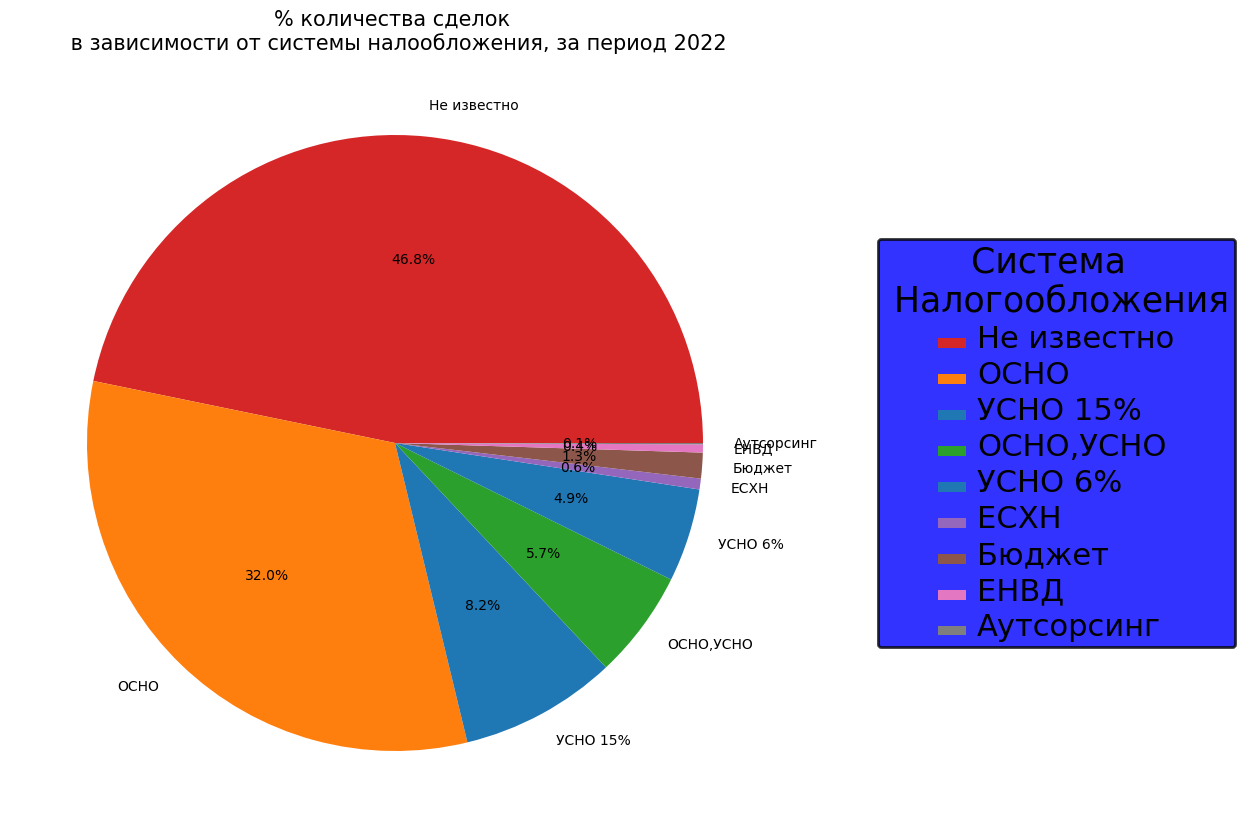

In [47]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

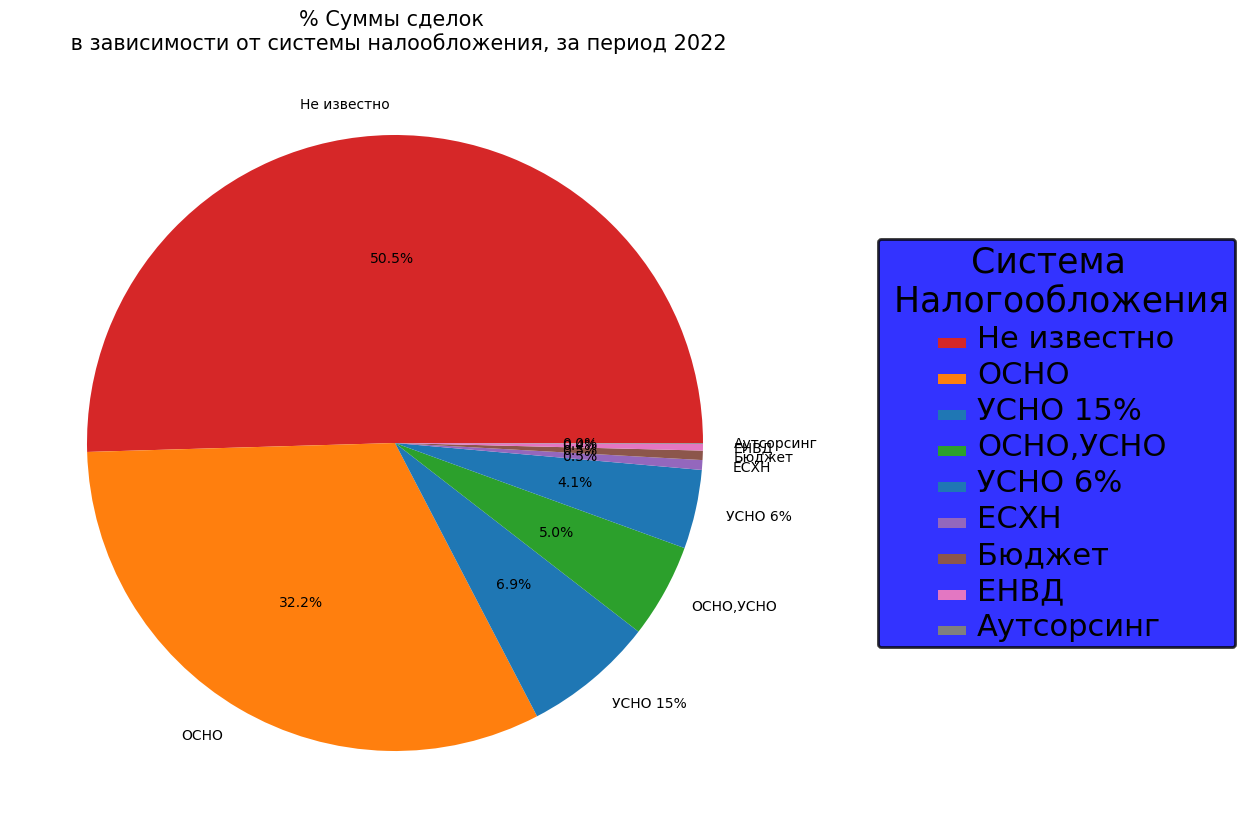

In [48]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаСделки'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

# Анализ по ИНН

In [49]:
data_i_cnt=data.groupby('ИНН_99',as_index=False) \
.aggregate({'Код':"count",'СуммаСделки':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)

data_i_cnt['% Суммы Сделок']=round(data_i_cnt['СуммаСделки']*100/data_i_cnt['СуммаСделки'].sum(),1)
data_i_cnt['% Количества Сделок']=round(data_i_cnt['Количество сделок']*100/data_i_cnt['Количество сделок'].sum(),1)

data_i_cnt[['ИНН_99','Количество сделок','% Количества Сделок','СуммаСделки','% Суммы Сделок']]


,ИНН_99,Количество сделок,% Количества Сделок,СуммаСделки,% Суммы Сделок
1,Нет,1402,99.5,84573020.42,99.6
0,Да,7,0.5,356067.35,0.4


# Анализ по КодОКВЭД 69

In [50]:
data_k_cnt=data.groupby('КодОКВЭД',as_index=False) \
.aggregate({'Код':"count",'СуммаСделки':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)
data_k_cnt

,КодОКВЭД,Количество сделок,СуммаСделки
2,69.20,89,5899020.57
1,69.10,30,2110804.56
0,69,20,929935.53
4,69.20.2,20,836967.19
5,69.20.3,12,1539558.84
3,69.20.1,4,430580.51


In [51]:
data_k_cnt=data.groupby('КодОКВЭД_69',as_index=False) \
.aggregate({'Код':"count",'СуммаСделки':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='Количество сделок', ascending=False)


data_k_cnt['% Суммы Сделок']=round(data_k_cnt['СуммаСделки']*100/data_k_cnt['СуммаСделки'].sum(),1)
data_k_cnt['% Количества Сделок']=round(data_k_cnt['Количество сделок']*100/data_k_cnt['Количество сделок'].sum(),1)

data_k_cnt[['КодОКВЭД_69','Количество сделок','% Количества Сделок','СуммаСделки','% Суммы Сделок']]


,КодОКВЭД_69,Количество сделок,% Количества Сделок,СуммаСделки,% Суммы Сделок
1,Нет,1234,87.6,73182220.57,86.2
0,Да,175,12.4,11746867.20,13.8


Text(0.5, 1.0, 'КодОКВЭД 69, количество сделок')

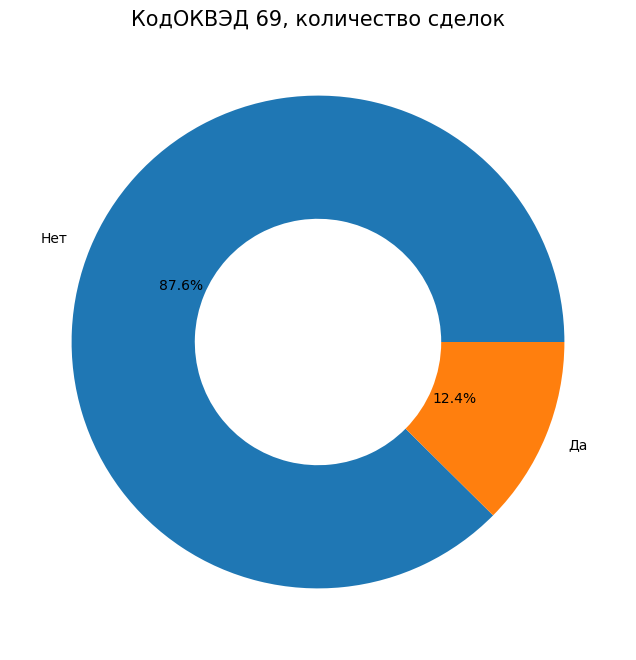

In [52]:
# Визуализация
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data_k_cnt['Количество сделок'], 
       labels=data_k_cnt['КодОКВЭД_69'], 
       wedgeprops=dict(width=0.5),
       autopct='%1.1f%%')

plt.title('КодОКВЭД 69, количество сделок', fontsize=15) 

Text(0.5, 1.0, 'КодОКВЭД 69, сумма сделок')

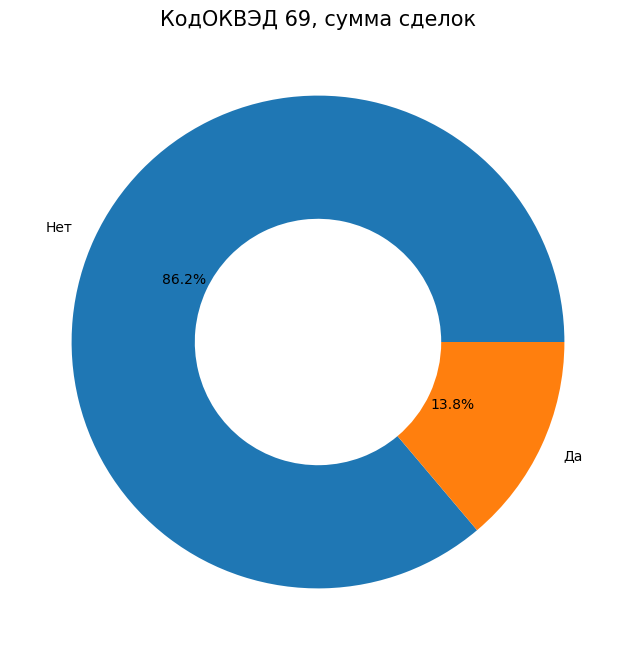

In [53]:
# Визуализация
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data_k_cnt['СуммаСделки'], 
       labels=data_k_cnt['КодОКВЭД_69'], 
       wedgeprops=dict(width=0.5),
       autopct='%1.1f%%')

plt.title('КодОКВЭД 69, сумма сделок', fontsize=15) 

# Рассмотрим выручки компаний по 4 системам налогообложения

# Система Налогообложения ОСНО

In [54]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))] 
quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [55]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 36052000.0
а у 85% больше 36052000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 43277000.0
а у 80% больше 43277000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 64205000.0
а у 75% больше 64205000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 162991000.0
а у 50% больше 162991000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 353271500.0
а у 25% больше 353271500.0


# Система Налогообложения УСНО 15%

In [56]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))] 
quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [57]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 10548400.0
а у 85% больше 10548400.0


У 20% клиентов, у которых была сделка, 
выручка меньше 15912000.000000004
а у 80% больше 15912000.000000004


У 25% клиентов, у которых была сделка, 
выручка меньше 20965000.0
а у 75% больше 20965000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 50997000.0
а у 50% больше 50997000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 100663000.0
а у 25% больше 100663000.0


# Система Налогообложения ОСНО,УСНО

In [58]:
osn_usn=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))] 
quantile_15 = osn_usn['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osn_usn['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osn_usn['ВыручкаОтПродаж'].quantile(0.25)
median=osn_usn['ВыручкаОтПродаж'].median()
quantile_75 =osn_usn['ВыручкаОтПродаж'].quantile(0.75)

In [59]:
print('Квартили распределения системы налогообложения ОСНО,УСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО,УСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 18158300.0
а у 85% больше 18158300.0


У 20% клиентов, у которых была сделка, 
выручка меньше 21504000.0
а у 80% больше 21504000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 26026250.0
а у 75% больше 26026250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 65628000.0
а у 50% больше 65628000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 158681250.0
а у 25% больше 158681250.0


# Система Налогообложения УСНО 6%

In [60]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))] 
quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

In [61]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 8561250.0
а у 85% больше 8561250.0


У 20% клиентов, у которых была сделка, 
выручка меньше 10413000.0
а у 80% больше 10413000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 12928000.0
а у 75% больше 12928000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 38206500.0
а у 50% больше 38206500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 92509500.0
а у 25% больше 92509500.0


# Вывод
- 1) Регион обслуживания Москва, статус Действующий;
- 2) Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 30 млн;
- b) УСНО 15% выручка компаний от 10 млн;
- c) ОСНО,УСНО выручка компаний от 18 млн;
- d) УСНО 6% выручка компаний от 8.5 млн.
- 3) КодОКВЭД начинающийся с 69, составляет 12.4 % количества сделок, и 13.8 % выручки ЧДК;
- 4) ИНН начинающийся с 99, составляет 0.5	% количества сделок, и 0.4 % выручки ЧДК. (Убрал бы из портретного)